# Introduction to neural networks
By: Isaac Rosenberg

Modern astronomy and physics now rely heavily on machine learning, from classifying galaxies to detecting signals from gravitational waves.  

But what *exactly* is happening inside these models that mimic “learning”?

We'll start with the *intuitive* idea of why we call them "neural" networks, and then build up to the mathematical structure.

We'll focus on **supervised learning**, where the model learns from labeled data. Along the way, we'll try to answer:

- What is a neural network?
- How do they learn?
- How do we structure our network?
- What kind of tasks are they useful for?

## What is a neural network?

### Connections to the brain

<img src="../attachments/neuron.png" alt="Neuron" width="800"/>

[Source: Casey L. Henley](https://openbooks.lib.msu.edu/neuroscience/chapter/the-neuron/)

Neural networks are *inspired* by biology but not literal replicas of it.  
In a biological neuron:
- Inputs are electrical signals from other neurons.
- The cell combines all the inputs it recieves into a signal.
- If the signal is above a certain threshold, the neuron **fires**.
    - When a neuron fires, it emits a strong electrical signal to all the neutrons that it connects to.

### Supervised vs unsupervised learning

<img src="../attachments/supervised.png" alt="Diagran of supervised vs unsupervised learning" width="800"/>

[Source: Wikipedia](https://en.wikipedia.org/wiki/Supervised_learning)

In supervised learning, our goal is to take data that we have *NEVER* seen before, and classify it.

### Step 1: Forward pass

<img src="../attachments/forward.png" alt="Diagram of forward pass" width="600"/>

The first step in training our network is called the forward pass. We take out *input*, apply some sort of *transformation* to it, and get an output. Later we will define exactly what this transformation is, but for now we can treat it as a series of non-linear functions.

### Step 2: Compute the error

<img src="../attachments/error.png" alt="Diagram of error" width="400"/>

We then want to see how far the output our network gave us is from what the output *should* have been. This means that we must already know what we expect the output to be. This is called "labelled data," and we need it to perform supervised learning.

So, if we wanted to make a neural network that takes images of cats and dogs and classifies them, we need LABELLED TRAINING DATA, which would be images of what we know are cats, and images of what we know are dogs.

### Step 3: Backward pass

<img src="../attachments/backprop.png" alt="Diagram of backprop" width="600"/>

After we calculate the error<sup><a href="#fn1" id="fnref1">1</a></sup>, we use this to adjust our transformation. The algorithm that lets us do this is called backpropagation, which we will discuss later on.

<b id="fn1">1.</b> Actually, we usually do not use the error when adjusting our transformation. Instead, we often use a function called the loss $L = \frac{e^T e}{2}$ <a href="#fnref1"></a>

Why bother with the square?

1. **Smooth gradients:** Squaring makes the loss differentiable everywhere, so it is easier to update our transformations.  
2. **Penalty grows with magnitude:** Bigger mistakes create proportionally larger updates.  
3. **Convenient derivative:** $\frac{\partial L}{\partial y_{\text{pred}}} = y_{\text{pred}} - y_{\text{true}} = \text{error}$, which plugs neatly into backprop.

Keep this distinction in mind: we *measure* error, but we *optimize* loss.

### Step 4: Repeat

We then do this again, and again, and again. But with different input data! Depending on your network you may need hundreds, thousands or millions of labelled pairs of input data.

### Step 5: Testing

After we train our neural network using *labelled training data*, we now want to test it! To do so, we will take new input data, called *labelled testing data*, compute the output, and see how correct it is.

<img src="../attachments/network_testing.png" alt="Diagram of testing" width="600"/>

If we are happy with how correct the network is, then we trained it well. 

Now we can give it *unlabelled* data, and use the output to classify what kind of input it recieved.

If we are unhappy with it, we should go back and make some adjustments with how we trained it.

### Toy model: differentiating cats and dogs

<img src="../attachments/cat_dog.png" alt="Diagram of cat/dog classication network" width="600"/>

<img src="../attachments/cat_forward.png" alt="Diagram of cat forward" width="600"/>

<img src="../attachments/cat_error.png" alt="Diagram of cat error" width="600"/>

## The structure of neural networks

The study of neural networks began in attempt to introduce a mathematical formalism to describe this process.

<img src="../attachments/neural_network.png" width="600"/>

[Source: Geeksforgeeks](https://www.geeksforgeeks.org/artificial-intelligence/artificial-neural-networks-and-its-applications/)

A neural network is an algorithm between nodes that can process data. 

Each line represents a **connection** carrying a signal with a certain *strength* (the weight).  

Each circle here is a *node*, which takes all the inputs (lines) it recieves, and transforms it into an *output*.

Beginning on the left, we have some sort of input, split up into four nodes. We have two hidden layers, each with five nodes, and finally an output layer of four nodes. Again, every node only outputs a number.

A neural network connects many such nodes in layers.

- **Input layer:** receives numerical features (e.g., pixel values, fluxes)
- **Hidden layers:** combine and transform these signals through weighted connections
- **Output layer:** produces the model’s prediction or classification

### Weights

Each line is applying some *weight* to the value of a given node. These weights determine how strongly one neuron's output influences another.

If we label the inputs to a neuron as $x_1, x_2, \dots, x_n$ and their corresponding weights as $w_{1j}, w_{2j}, \dots, w_{nj}$ for neuron $j$, the neuron first computes a weighted sum:

$
z_j = \sum_{i=1}^{n} w_{ij} x_i + b_j
$

Here $b_j$ is the bias term that shifts the activation threshold. Back to the analogy of the human brain, the bias terms represents the baseline electric signal each neuron is recieving, regardless of the inputs from firing neurons. 

In vector form we can write the same operation as $\mathbf{z} = W \mathbf{x} + \mathbf{b}$, where $W$ is a matrix whose entries are the weights between layers. The activation function $a_j = \sigma(z_j)$ then turns that linear combination into a non-linear output.


### Activation functions

Inside each node, after computing $z_j$, we apply an *activation function* that decides what signal the neuron sends onward. 

It is **very** important that this function is non-linear. In fact, it is **because** the activation function is non linear that neural networks work at all.

Without this extra step the entire network would collapse to the composition of many linear functions, which would also be linear. As a result, our network would only be able to model linear functions, and that is **not good**.

Non-linearity is what lets the network bend and fold space to carve out complicated decision boundaries.


<img src="../attachments/activation_function_diagram.png" width="600"/>

[Source: Tomorrow Bio](https://www.tomorrow.bio/post/weight-for-it-how-neural-networks-get-stronger-2023-06-4669545292-ai)

A few common activation functions appear everywhere:

 **Sigmoid:** $\sigma(z) = \frac{1}{1 + e^{-z}}$. Smoothly squashes any input to $(0, 1)$, which makes it handy when we want to interpret the output as a probability.

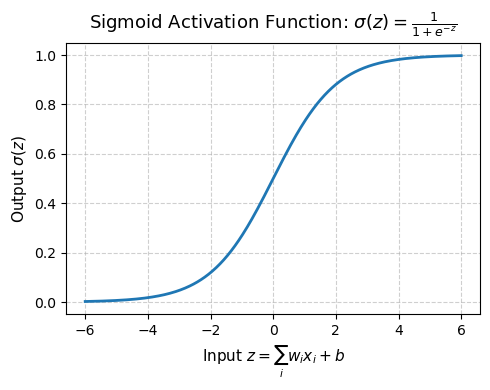

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate input values
x = np.linspace(-6, 6, 400)
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(5, 4))
plt.plot(x, y, linewidth=2)
plt.title(r"Sigmoid Activation Function: $\sigma(z) = \frac{1}{1 + e^{-z}}$", fontsize=13, pad=10)
plt.xlabel(r"Input $z = \sum_i w_i x_i + b$", fontsize=11)
plt.ylabel(r"Output $\sigma(z)$", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

 **Hyperbolic tangent (tanh):** $\tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$. Similar S-shape but centered at zero, so positive and negative activations are treated symmetrically.

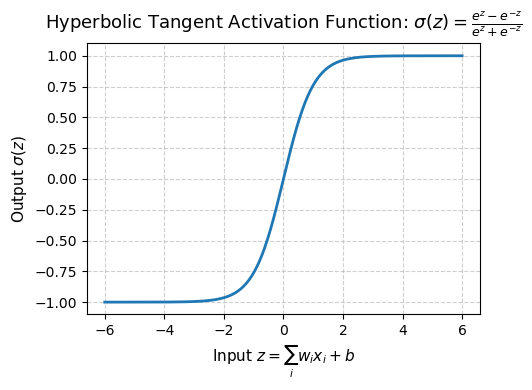

In [5]:
def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-6, 6, 400)
y = tanh(x)

# Create the plot
plt.figure(figsize=(5, 4))
plt.plot(x, y, linewidth=2)
plt.title(r"Hyperbolic Tangent Activation Function: $\sigma(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$", fontsize=13, pad=10)
plt.xlabel(r"Input $z = \sum_i w_i x_i + b$", fontsize=11)
plt.ylabel(r"Output $\sigma(z)$", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

 **ReLU (Rectified Linear Unit):** $\text{ReLU}(z) = \max(0, z)$. Keeps positive signals, zeroes out negative ones, and is cheap to compute, which is why modern deep networks tend to favor it.

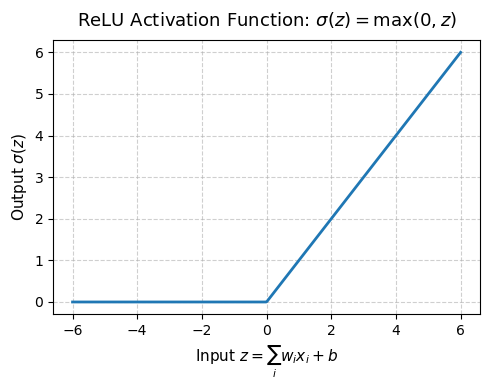

In [6]:
def relu(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-6, 6, 400)
y = relu(x)

# Create the plot
plt.figure(figsize=(5, 4))
plt.plot(x, y, linewidth=2)
plt.title(r"ReLU Activation Function: $\sigma(z) = \max(0, z)$", fontsize=13, pad=10)
plt.xlabel(r"Input $z = \sum_i w_i x_i + b$", fontsize=11)
plt.ylabel(r"Output $\sigma(z)$", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

When we write $\sigma(z)$, the $\sigma$ symbol just stands in for whichever activation function we choose. Picking the *right one* influences how quickly the model learns and what kinds of patterns it can express.

After passing this through our network, our final layer will output a 1-dimensional vector.

We then compute the error = $y_{\text{pred}} - y_{\text{true}}$, and the loss $L = \frac{e^T e}{2}$, as we saw in our toy model.

### Backpropagation (training via the chain rule, with indices)

Backpropagation is the systematic application of the **chain rule** to compute how every parameter in a neural network influences the loss. Starting from the output, we propagate gradients backward through each layer so every weight and bias gets its share of responsibility for the error.

---

1. **Start from the loss.**  
   For mean-squared error, the gradient with respect to the model output is  
   $$
   \frac{\partial L}{\partial y_{\text{pred}}} = y_{\text{pred}} - y_{\text{true}}.
   $$

---

2. **Apply the chain rule through each layer.**

   For one layer, define:
   - $a_{\text{prev}}$ — activations from the previous layer (a vector of size $n_{\text{in}}$)
   - $W$ — weight matrix of size $n_{\text{out}} \times n_{\text{in}}$
   - $b$ — bias vector of size $n_{\text{out}}$
   - $z = W a_{\text{prev}} + b$
   - $a = \sigma(z)$ — activation after applying the nonlinearity

   In component form:
   $$
   z_i = \sum_j W_{ij} a_{\text{prev}, j} + b_i.
   $$

   Here:
   - index **i** refers to the neuron in the current layer (the *output* index),
   - index **j** refers to the neuron in the previous layer (the *input* index).

   ---

   **Step 1 — from $L$ to $z_i$:**

   By the chain rule,
   $$
   \frac{\partial L}{\partial z_i}
   = \frac{\partial L}{\partial a_i} \cdot \frac{\partial a_i}{\partial z_i}
   = \frac{\partial L}{\partial a_i} \cdot \sigma'(z_i).
   $$

   ---

   **Step 2 — from $z_i$ to $W_{ij}$:**

   Again by the chain rule,
   $$
   \frac{\partial L}{\partial W_{ij}}
   = \frac{\partial L}{\partial z_i} \cdot \frac{\partial z_i}{\partial W_{ij}}.
   $$

   From $z_i = \sum_j W_{ij} a_{\text{prev}, j} + b_i$, we get:
   $$
   \frac{\partial z_i}{\partial W_{ij}} = a_{\text{prev}, j}.
   $$

   Therefore,
   $$
   \frac{\partial L}{\partial W_{ij}} = \frac{\partial L}{\partial z_i} \, a_{\text{prev}, j}.
   $$

   Writing this for all $i, j$ in matrix form gives:
   $$
   \frac{\partial L}{\partial W} = \left( \frac{\partial L}{\partial z} \right) a_{\text{prev}}^{\top}.
   $$

   ---

   **Step 3 — for biases:**
   $$
   \frac{\partial L}{\partial b_i} = \frac{\partial L}{\partial z_i},
   \quad \text{or simply} \quad
   \frac{\partial L}{\partial b} = \frac{\partial L}{\partial z}.
   $$

   ---

   **Step 4 — for activation function:**

   We also need the gradient of the loss with respect to the previous layer’s activations:
   $$
   \frac{\partial L}{\partial a_{\text{prev}, j}}
   = \sum_i \frac{\partial L}{\partial z_i} \cdot \frac{\partial z_i}{\partial a_{\text{prev}, j}}
   = \sum_i \frac{\partial L}{\partial z_i} \cdot W_{ij}.
   $$

   In matrix form:
   $$
   \frac{\partial L}{\partial a_{\text{prev}}} = W^{\top} \frac{\partial L}{\partial z}.
   $$

---

3. **Update parameters.**  
   Adjust weights and biases with learning rate $\eta$:
   $$
   W \leftarrow W - \eta \, \frac{\partial L}{\partial W},
   \qquad
   b \leftarrow b - \eta \, \frac{\partial L}{\partial b}.
   $$

---

**Two-layer example.**  
If $a^{(1)} = \sigma_1(W_1 x + b_1)$ and $y_{\text{pred}} = \sigma_2(W_2 a^{(1)} + b_2)$, then the chain rule gives:
$$
\begin{aligned}
\frac{\partial L}{\partial z^{(2)}} &= \frac{\partial L}{\partial y_{\text{pred}}} \, \sigma_2'(z^{(2)}), \\
\frac{\partial L}{\partial W_2} &= \frac{\partial L}{\partial z^{(2)}} (a^{(1)})^{\top}, 
\quad
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial z^{(2)}}, \\[4pt]
\frac{\partial L}{\partial z^{(1)}} &= (W_2^{\top} \frac{\partial L}{\partial z^{(2)}}) \, \sigma_1'(z^{(1)}), \\
\frac{\partial L}{\partial W_1} &= \frac{\partial L}{\partial z^{(1)}} x^{\top},
\quad
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial z^{(1)}}.
\end{aligned}
$$

---

**Learning rate ($\eta$).**  
The symbol $\eta$ (eta) is called the **learning rate**. It’s a **hyperparameter**, meaning it’s set by you, not learned by the model.  

It controls how big a step the model takes when updating weights:
- If $\eta$ is **too large**, the model may overshoot and fail to learn.
- If $\eta$ is **too small**, learning becomes very slow.

Finding a good learning rate usually takes some trial and error, or using more complicated learning algorithms.


Modern frameworks (like PyTorch, JAX) perform these steps automatically using *automatic differentiation*, so you don't need to compute all these derivatives by hand.

## Advanced Techniques

We have now defined everything that we need to build a neural network. All these tools that we used have been known since the 1980s. So why is AI booming now? What's changed?

In this section, we will briefly go over a few popular techniques that revolutionized the speed and capabilities of neural networks.

### Minibatches

In the discussion above, we assumed we took one input, propagated in forward, computed the error, and propagated that backward. 

This method actually has several issues. First, it is computationally expensive. Everytime we have a new input, we need to pass it through and reupdate our weights. In addition, it is very prone to *overfitting*. We risk everytime that we update our weights, we update it in accordance to best fit that one individual sample, but it may not be representative of our whole input catalog.

How do we solve this? We send our data in minibatches. So, if our input used to be a 10 x 1 column vector, if we have a minibatch of size 100, we will input a 10 x 100 matrix instead!

### Convolutional Neural Networks (CNNs)

These were first introduced around 1990 but became very popular in the last 30 years. 

Again, the motivation came from biology. In our brains, the neurons are not **fully connected**. They can only recieve a signal from the neurons "nearby."

<img src="../attachments/receptive_field.png" width="800"/>

[Source: Nursing Hero](https://www.nursinghero.com/study-guides/austincc-ap1/pain)

So, folks decided to implement this into their artifical neural networks as well.

<img src="../attachments/receptive_field_nn.png" width="600"/>

[Source: Lin+2017](https://www.mdpi.com/2072-4292/9/5/480)

This is useful, but we are not at CNNs yet. To make a CNN we need to go one step further. Not only will a neuron only recieve a signal from the nodes nearby, but the weights it assigns to them will be the same as the weights a **different neuron** assigns to its own inputs!

This seems quite counterintuitive. Why should neurons that are in no causal contact with each other have the same weights?

<img src="../attachments/cnn.png" width="900"/>

[Source: Maurice Weiler](https://maurice-weiler.gitlab.io/blog_post/cnn-book_2_conventional_cnns/)

Why does this help?

- Helps network learn spatial features
- Avoids recalculating our weights separately every neuron.

### Dropout

## Wrapping Up

We saw how neural networks perform a forward pass, measure error, and use backpropagation to update weights. Keep in mind:
- Data preprocessing (normalization, train/validation splits) is just as important as the model.
- Hyperparameters such as learning rate, layer width, and activation choice affect whether training converges.
- Modern libraries automate backpropagation, but understanding the manual chain rule helps dispell the narrative of a "black box."

### Next steps
- Let's make out own neural network... from scratch!
